In [28]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

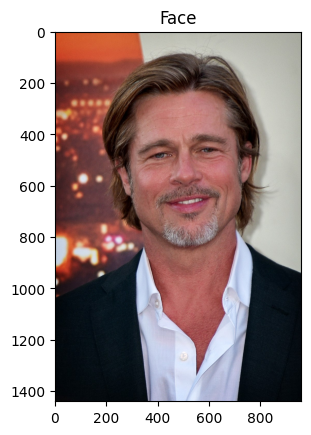

In [29]:
faceImage = cv2.imread('bradd.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [30]:
faceImage.shape

(1440, 960, 3)

In [31]:
faceImage.shape

(1440, 960, 3)

Text(0.5, 1.0, 'glassPNG')

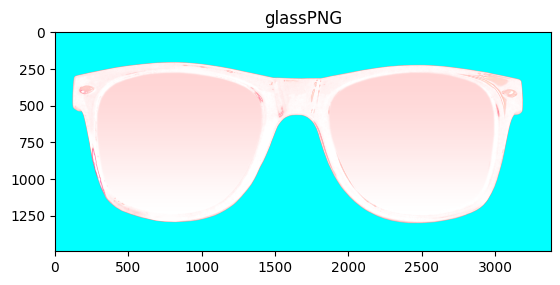

In [32]:
glassPNG = cv2.imread('sunglasses.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [84]:
h, w = faceImage.shape[:2]
glassW = w // 2
aspect = glassPNG.shape[0] / glassPNG.shape[1]
glassH = int(glassW * aspect)
glassPNG = cv2.resize(glassPNG,(glassW,glassH))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(212, 480, 4)


In [85]:
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

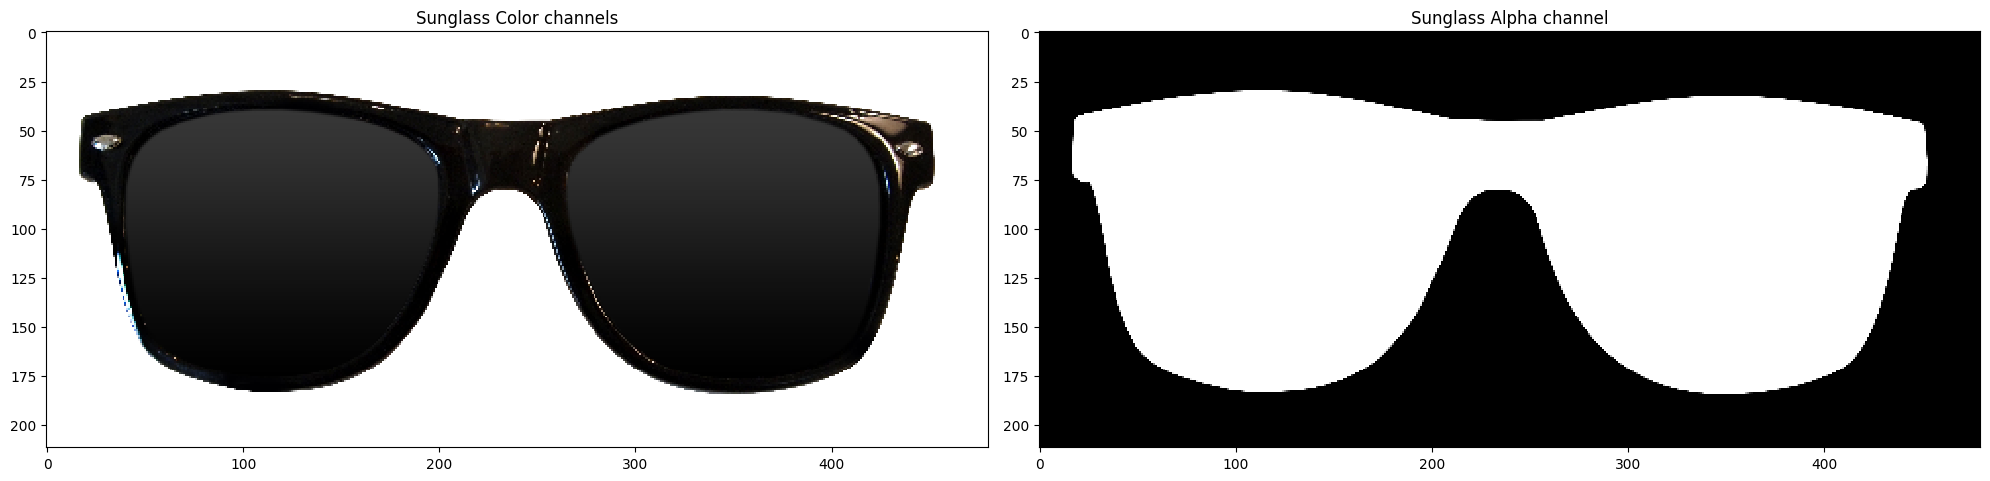

In [86]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.imshow(glassBGR[:,:,::-1], interpolation='nearest'); plt.title('Sunglass Color channels')
plt.subplot(122); plt.imshow(glassMask1, cmap='gray', interpolation='none', vmin=0, vmax=255); plt.title('Sunglass Alpha channel')
plt.tight_layout()
plt.show()


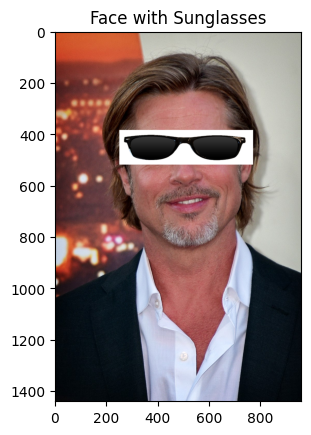

In [91]:
faceWithGlassesNaive = faceImage.copy()

# Corrected eye region coordinates (swapped 455:385 to 385:455)
start_row, end_row = 385, 520  # Rows for eye region
start_col, end_col = 250, 770  # Columns for eye region

# Resize glassBGR to match the slice (70 rows x 190 cols)
glassBGR_resized = cv2.resize(glassBGR, (end_col - start_col, end_row - start_row))

# Replace the eye region with the sunglasses image
faceWithGlassesNaive[start_row:end_row, start_col:end_col] = glassBGR_resized

# Display the result
plt.imshow(faceWithGlassesNaive[...,::-1])
plt.title("Face with Sunglasses")
plt.axis('on')
plt.show()

Text(0.5, 1.0, 'Face With Sunglasses')

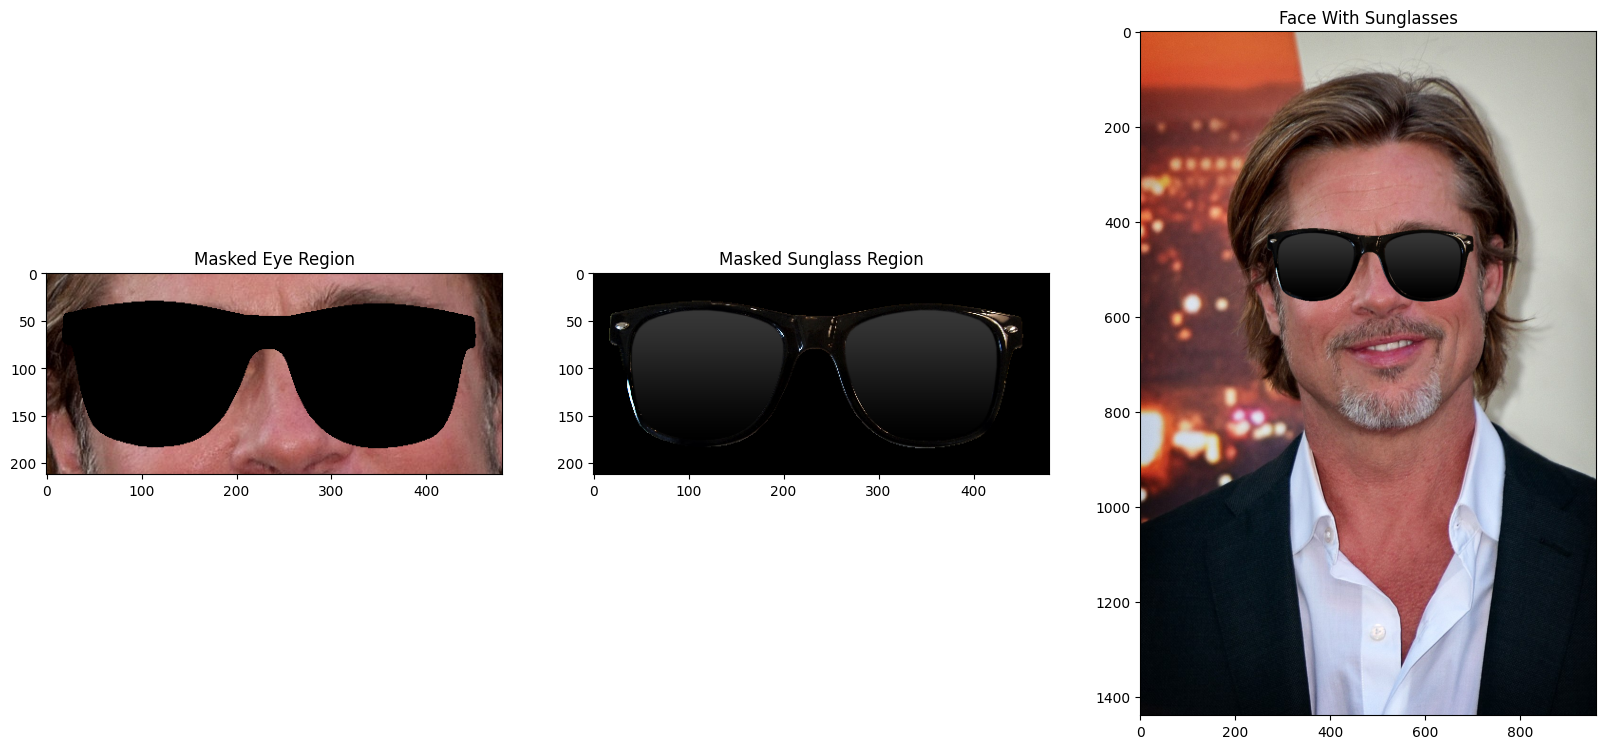

In [92]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Make the values [0,1] since we are using arithmetic operations
glassMask = np.uint8(glassMask/255)

# Make a copy
faceWithGlassesArithmetic = faceImage.copy()

# --- Corrected ROI size to match glass dimensions ---
gh, gw = glassBGR.shape[:2]   # glass height & width
x, y = 250, 385               # top-left placement (adjustable)
eyeROI = faceWithGlassesArithmetic[y:y+gh, x:x+gw]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1- glassMask ))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Put final back into face
faceWithGlassesArithmetic[y:y+gh, x:x+gw] = eyeRoiFinal

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(faceWithGlassesArithmetic[...,::-1]);plt.title("Face With Sunglasses")
